# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

## <span style="color:darkred">Revisão</span>

**Material Produzido por Moacir Antonelli Ponti**

**Cemeai - ICMC/USP São Carlos**


---
__Conteúdo:__
1. Dados não estruturados x estruturados
2. Informações faltantes 
3. Desbalanceamento 
4. Duplicatas/redundância
5. Codificação de variáveis categóricas com dummy variables
6. Deteção de outliers
7. Normalização
***

# 1. Dados não estruturados x estruturados

Dados não estruturados são símbolos organizados em documentos de vários formatos.

Estruturados possuem estrura organizada em tabelas, comumente com:
* linhas equivalendo a instâncias/observações
* colunas equivalendo a atributos/características

## Dados não estruturados:

Documentos:
* emails, 
* artigos,
* documentos em PDF,
* comentários e postagens em redes sociais,
* interacão entre consumidores,
* áudio,
* dados adquiridos por sensores

Características de dados não estruturados:
* **binários** e/ou **caracteres**
* **alta flexibilidade** (não possuem esquema)
* **coleta** feita com baixo **controle** (*in the wild*)
* **não verificados** / **não certificados**
* possuem alta **redundância**
* possuem alta **dimensionalidade**


## Dados estruturados

Elementos são *enderecáveis*, facilitando armazenamento e recuperação, organizados em um repositório formatado.

Dados estruturados estão prontos para ser armazenados em **bases de dados relacionais**
 
 * **Campo, atributo ou variável**: um elemento específico para o qual temos dados, por exemplo: username na primeira tabela mostrada, relativo a *coluna* da tabela
 * **Tupla, registro, instância**: um conjunto de valores de atributos, por exemplo: (joao@provider.com, João, Oliveira, 1996), relativo à *linha* da tabela
 * **Tabela ou relação**: conjunto de linhas e colunas compartilhando os mesmos atributos, organizando a mesma informação acerca de um tipo de objeto

# 2.  Informações faltantes (*missing data*)

A maior causa da existência de dados faltantes está no projeto do protocolo de *coleta de dados* e na sua execução.

### Tratamento: remover ou preencher

* remover é a estratégia mais conservadora: linhas ou atributos
* preencher pode inserir um viés nos dados, mas por vezes é o único recurso

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data1 = pd.read_csv("dados1.csv", sep=',', header=0)

print("Número de observacoes na base de dados: ", data1.shape[0])
data1[:10]

Número de observacoes na base de dados:  32


,e-mail,Name,Sex,Rate
0,eug_ewell@live.com,Eugenio Ewell,M,NaN
1,NaN,Ivo Izidro,M,5.0
2,multiplx@mac.com,Lindsey Lever,NaN,3.0
3,bader@sbcglobal.net,Desiree Dardar,F,NaN
4,nasarius@aol.com,Mariann Mulero,F,3.0
5,jusdisgi@outlook.com,Kathey Kleiman,F,4.0
6,rrollison@aol.com,Rupert Rollison,M,2.0
7,seymoress@aol.com,Signe Seymore,F,NaN
8,loralemo@gmail.com,Lora Lemoine,F,4.0
9,NaN,Leanne Lowy,F,4.0


In [16]:
data1.isna()

,e-mail,Name,Sex,Rate
0,False,False,False,True
1,True,False,False,False
2,False,False,True,False
3,False,False,False,True
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,True
8,False,False,False,False
9,True,False,False,False


In [17]:
# inspecao por colunas/atributos
for column_name, item in data1.iteritems():
    print('Coluna/atributo:', column_name)
    print('\tPossui faltantes?', item.isna().any())

Coluna/atributo: e-mail
	Possui faltantes? True
Coluna/atributo: Name
	Possui faltantes? False
Coluna/atributo: Sex
	Possui faltantes? True
Coluna/atributo: Rate
	Possui faltantes? True


In [18]:
# preenchendo os dados faltantes com uma constante
# todos os elementos faltantes do atributo/coluna Rate -> 0.0
data1['Rate'] = data1['Rate'].fillna(0.0)

In [19]:
for column_name, item in data1.iteritems():
    print('Coluna/atributo:', column_name)
    print('\tPossui faltantes?', item.isna().any())

Coluna/atributo: e-mail
	Possui faltantes? True
Coluna/atributo: Name
	Possui faltantes? False
Coluna/atributo: Sex
	Possui faltantes? True
Coluna/atributo: Rate
	Possui faltantes? False


In [20]:
# removendo elementos faltantes

# linhas faltantes no atributo Sex
data1 = data1.dropna(subset=['Sex'])

# colunas com faltantes ainda existentes
data1 = data1.dropna(axis=1)

In [21]:
for column_name, item in data1.iteritems():
    print('Coluna/atributo:', column_name)
    print('\tPossui faltantes?', item.isna().any())

Coluna/atributo: Name
	Possui faltantes? False
Coluna/atributo: Sex
	Possui faltantes? False
Coluna/atributo: Rate
	Possui faltantes? False


# 3. Desbalanceamento



In [22]:
data1['Sex'].value_counts()

F    19
M     9
Name: Sex, dtype: int64

<AxesSubplot:>

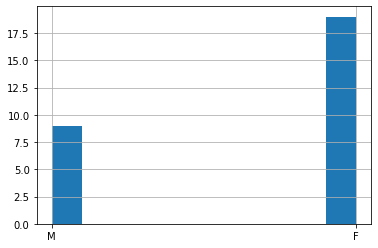

In [23]:
data1['Sex'].hist()

In [24]:
data1[data1['Sex']=='F'].sample(n=9)

,Name,Sex,Rate
14,Valeri Vanegas,F,4.0
10,Eleanore Espitia,F,5.0
4,Mariann Mulero,F,3.0
8,Lora Lemoine,F,4.0
27,Lillian Labree,F,2.0
22,Ariel Almada,F,5.0
5,Kathey Kleiman,F,4.0
26,Joelle Jaffee,F,2.0
16,Magali Mattos,F,5.0


In [25]:
data1.sample(6)

,Name,Sex,Rate
6,Rupert Rollison,M,2.0
28,Oleta Ouk,F,4.0
26,Joelle Jaffee,F,2.0
14,Valeri Vanegas,F,4.0
21,Marcos Magro,M,3.0
27,Lillian Labree,F,2.0


In [27]:
# cria um novo dataframe com uma amostra de 9 instancias Sex=F
data_bal = data1[data1['Sex']=='F'].sample(n=9)

In [28]:
data_bal

,Name,Sex,Rate
7,Signe Seymore,F,0.0
8,Lora Lemoine,F,4.0
10,Eleanore Espitia,F,5.0
20,Willene Wolfgram,F,1.0
27,Lillian Labree,F,2.0
3,Desiree Dardar,F,0.0
31,Ariel Almada,F,5.0
11,Mayra Mcnish,F,3.0
28,Oleta Ouk,F,4.0


In [29]:
# insere todas as instancias do Sex=M
data_bal = data_bal.append(data1[data1['Sex']=='M'])

In [30]:
data_bal

,Name,Sex,Rate
7,Signe Seymore,F,0.0
8,Lora Lemoine,F,4.0
10,Eleanore Espitia,F,5.0
20,Willene Wolfgram,F,1.0
27,Lillian Labree,F,2.0
3,Desiree Dardar,F,0.0
31,Ariel Almada,F,5.0
11,Mayra Mcnish,F,3.0
28,Oleta Ouk,F,4.0
0,Eugenio Ewell,M,0.0


In [37]:
(0.0+3.0)*(np.random.random())

1.8820552121393623

In [31]:
data_bal['Sex'].value_counts()

F    9
M    9
Name: Sex, dtype: int64

# 4. Duplicatas/redundância

In [39]:
data1[data1.duplicated()]

,Name,Sex,Rate
30,Magali Mattos,F,5.0
31,Ariel Almada,F,5.0


In [40]:
data1 = data1.drop_duplicates(keep='first')

In [41]:
data1[data1.duplicated()]

,Name,Sex,Rate


# 5. Codificação de variáveis categóricas

In [42]:
data2 = pd.read_csv("dados2.csv")
data2.head()

,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,IDH,urbaniz,dens_pop_urbana
0,752,ACRE,Acrelândia,2010.0,151120.015625,12241,2,5.2,33.532382,73.6,19.2,660,rural,muito baixa
1,747,ACRE,Assis Brasil,2010.0,48347.300781,5662,1,5.0,32.252163,74.2,18.9,664,rural,muito baixa
2,748,ACRE,Brasiléia,2010.0,194979.828125,20238,1,3.0,31.663354,75.3,19.5,667,baixo,média
3,754,ACRE,Bujari,2010.0,88708.031250,6772,2,4.8,33.501357,73.4,19.1,659,rural,muito baixa
4,751,ACRE,Capixaba,2010.0,89052.679688,9287,1,4.4,33.431383,75.4,18.1,661,rural,muito baixa


In [43]:
uf_encoding = pd.get_dummies(data2['UF'])

In [44]:
uf_encoding

,ACRE,ALAGOAS,AMAPÁ,AMAZONAS,BAHIA,CEARÁ,DISTRITO FEDERAL,ESPIRITO SANTO,GOIÁS,MARANHÃO,...,PIAUÍ,RIO DE JANEIRO,RIO GRANDE DO NORTE,RIO GRANDE DO SUL,RONDÔNIA,RORAIMA,SANTA CATARINA,SERGIPE,SÃO PAULO,TOCANTINS
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
data2 = pd.concat([data2, uf_encoding], axis=1, sort=False)
data2.sample(5)

,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,...,PIAUÍ,RIO DE JANEIRO,RIO GRANDE DO NORTE,RIO GRANDE DO SUL,RONDÔNIA,RORAIMA,SANTA CATARINA,SERGIPE,SÃO PAULO,TOCANTINS
2995,4143,PARANÁ,Maripá,2010.0,137408.859375,5673,3,4.6,63.404926,78.6,...,0,0,0,0,0,0,0,0,0,0
3611,1935,RIO DE JANEIRO,Comendador Levy Gasparian,2010.0,150088.640625,8839,2,8.6,85.461728,75.5,...,0,1,0,0,0,0,0,0,0,0
5101,4704,SÃO PAULO,Pacaembu,2010.0,117579.875000,13778,1,5.9,89.888558,77.0,...,0,0,0,0,0,0,0,0,1,0
5077,4683,SÃO PAULO,Nova Canaã Paulista,2010.0,29424.886719,2172,2,6.4,90.129717,77.6,...,0,0,0,0,0,0,0,0,1,0
3143,4162,PARANÁ,Sapopema,2010.0,51161.984375,6800,1,3.3,64.404298,76.0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
data2.drop('UF', axis=1, inplace=True)

In [47]:
data2.sample(8)

,gid,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,...,PIAUÍ,RIO DE JANEIRO,RIO GRANDE DO NORTE,RIO GRANDE DO SUL,RONDÔNIA,RORAIMA,SANTA CATARINA,SERGIPE,SÃO PAULO,TOCANTINS
2057,3755,Monte Alegre de Minas,2010.0,361592.750000,19051,2,7.2,78.960231,76.5,5.3,...,0,0,0,0,0,0,0,0,0,0
25,782,Atalaia,2010.0,208935.734375,53023,1,8.5,31.438392,73.3,21.5,...,0,0,0,0,0,0,0,0,0,0
5145,5078,Pirapora do Bom Jesus,2010.0,123798.367188,15706,1,7.7,89.547052,78.8,3.4,...,0,0,0,0,0,0,0,0,1,0
4602,5450,Paulo Lopes,2010.0,84931.421875,7255,2,7.8,73.867811,77.9,2.7,...,0,0,0,0,0,0,1,0,0,0
762,1889,Poranga,2010.0,34502.445312,12356,1,4.3,40.826820,74.8,18.8,...,0,0,0,0,0,0,0,0,0,0
751,2019,Paracuru,2010.0,166716.234375,32557,1,4.5,42.360716,73.2,17.6,...,0,0,0,0,0,0,0,0,0,0
5203,4785,Riversul,2010.0,43661.617188,6520,1,6.6,90.351562,79.6,2.2,...,0,0,0,0,0,0,0,0,1,0
3836,1675,Tenente Ananias,2010.0,39965.722656,9655,1,8.5,44.802211,75.8,13.3,...,0,0,1,0,0,0,0,0,0,0


# 6. Deteção de outliers


<AxesSubplot:>

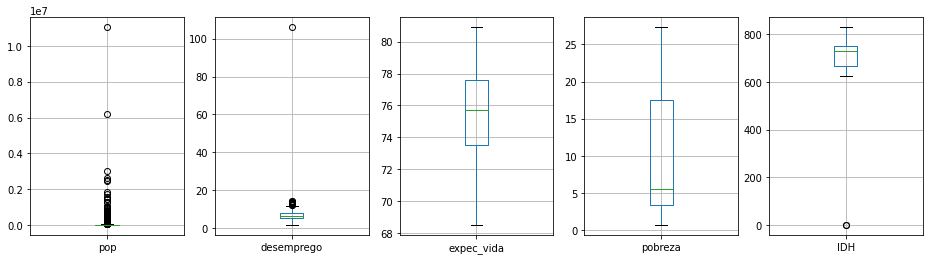

In [48]:
plt.figure(figsize=(16,4))
plt.subplot(151); data2.boxplot(['pop'])
plt.subplot(152); data2.boxplot(['desemprego'])
plt.subplot(153); data2.boxplot(['expec_vida'])
plt.subplot(154); data2.boxplot(['pobreza'])
plt.subplot(155); data2.boxplot(['IDH'])

In [49]:
data2[data2['pop'] >= 0.6e7]

,gid,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,...,PIAUÍ,RIO DE JANEIRO,RIO GRANDE DO NORTE,RIO GRANDE DO SUL,RONDÔNIA,RORAIMA,SANTA CATARINA,SERGIPE,SÃO PAULO,TOCANTINS
3658,2001,Rio de Janeiro,2010.0,175739344.0,6186710,3,7.4,86.462302,75.9,3.2,...,0,1,0,0,0,0,0,0,0,0
5270,5088,São Paulo,2010.0,389317152.0,11037593,3,7.1,89.592798,78.0,2.6,...,0,0,0,0,0,0,0,0,1,0


In [50]:
data2[data2['desemprego'] >= 20]

,gid,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,...,PIAUÍ,RIO DE JANEIRO,RIO GRANDE DO NORTE,RIO GRANDE DO SUL,RONDÔNIA,RORAIMA,SANTA CATARINA,SERGIPE,SÃO PAULO,TOCANTINS
26,742,Barra de Santo Antônio,2010.0,53292.316406,14435,1,106.0,31.428897,72.0,20.6,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# remover todos os dados cujo desemprego é maior do que 100%, ou seja, mantenho <=100
data2 = data2.loc[data2['desemprego'] <= 100]

In [52]:
data2.loc[data2['IDH'] <= 100, ['nome', 'pop', 'IDH']]

,nome,pop,IDH
4411,São Luiz,5979,0
4412,Uiramutã,7934,0


In [53]:
data2 = data2[data2['IDH'] > 100]

<AxesSubplot:>

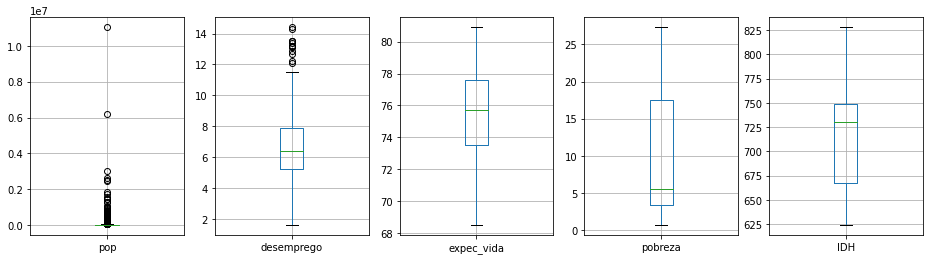

In [54]:
plt.figure(figsize=(16,4))
plt.subplot(151); data2.boxplot(['pop'])
plt.subplot(152); data2.boxplot(['desemprego'])
plt.subplot(153); data2.boxplot(['expec_vida'])
plt.subplot(154); data2.boxplot(['pobreza'])
plt.subplot(155); data2.boxplot(['IDH'])

In [55]:
data2.shape

(5562, 40)

# 7. Normalização

In [56]:
from sklearn.preprocessing import MinMaxScaler # min-max 0-1
from sklearn.preprocessing import StandardScaler # z-score

In [57]:
np.histogram(data2['expec_vida'])

(array([ 116,  217,  355,  647,  777,  780,  914, 1002,  568,  186]),
 array([68.5 , 69.74, 70.98, 72.22, 73.46, 74.7 , 75.94, 77.18, 78.42,
        79.66, 80.9 ]))

In [60]:
max_ev = np.max(data2['expec_vida'])
min_ev = np.min(data2['expec_vida'])
print(max_ev)
print(min_ev)

80.9
68.5


In [62]:
exp_vida_01 = (data2['expec_vida']-min_ev)/(max_ev-min_ev)

In [63]:
med_ev = np.mean(data2['expec_vida'])
std_ev = np.std(data2['expec_vida'])
print(med_ev)
print(std_ev)

75.48103200287666
2.6650530742527194


In [64]:
exp_vida_std = (data2['expec_vida']-med_ev)/std_ev

In [68]:
# instancia objetos dos normalizadores
std_scal = StandardScaler()
mm_scal = MinMaxScaler()

# utilizando o StandardScaler
std_scal.fit(np.array(data2['expec_vida']).reshape(-1, 1))

des_std = std_scal.transform(np.array(data2['expec_vida']).reshape(-1, 1))

In [69]:
np.histogram(des_std)

(array([ 116,  217,  355,  647,  777,  780,  914, 1002,  568,  186]),
 array([-2.61947204, -2.1541905 , -1.68890896, -1.22362741, -0.75834587,
        -0.29306433,  0.17221721,  0.63749875,  1.10278029,  1.56806183,
         2.03334337]))

In [70]:
mm_scal.fit(np.array(data2['expec_vida']).reshape(-1, 1))
des_mm = mm_scal.transform(np.array(data2['expec_vida']).reshape(-1, 1))

In [71]:
np.histogram(des_mm)

(array([ 116,  217,  355,  647,  777,  780,  914, 1002,  568,  186]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [72]:
des_mm

array([[0.41129032],
       [0.45967742],
       [0.5483871 ],
       ...,
       [0.45967742],
       [0.47580645],
       [0.46774194]])

In [73]:
des_std

array([[-0.70581409],
       [-0.48067786],
       [-0.0679281 ],
       ...,
       [-0.48067786],
       [-0.40563245],
       [-0.44315515]])

In [74]:
data2['expec_vida_mm'] = des_mm

In [75]:
data2

,gid,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,...,RIO DE JANEIRO,RIO GRANDE DO NORTE,RIO GRANDE DO SUL,RONDÔNIA,RORAIMA,SANTA CATARINA,SERGIPE,SÃO PAULO,TOCANTINS,expec_vida_mm
0,752,Acrelândia,2010.0,151120.015625,12241,2,5.2,33.532382,73.6,19.2,...,0,0,0,0,0,0,0,0,0,0.411290
1,747,Assis Brasil,2010.0,48347.300781,5662,1,5.0,32.252163,74.2,18.9,...,0,0,0,0,0,0,0,0,0,0.459677
2,748,Brasiléia,2010.0,194979.828125,20238,1,3.0,31.663354,75.3,19.5,...,0,0,0,0,0,0,0,0,0,0.548387
3,754,Bujari,2010.0,88708.031250,6772,2,4.8,33.501357,73.4,19.1,...,0,0,0,0,0,0,0,0,0,0.395161
4,751,Capixaba,2010.0,89052.679688,9287,1,4.4,33.431383,75.4,18.1,...,0,0,0,0,0,0,0,0,0,0.556452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,1011,Tocantinópolis,2010.0,124657.000000,21826,1,6.5,28.405306,75.0,12.6,...,0,0,0,0,0,0,0,0,1,0.524194
5561,5545,Tupirama,2010.0,34883.894531,1474,3,4.6,29.447854,74.8,12.9,...,0,0,0,0,0,0,0,0,1,0.508065
5562,5546,Tupiratins,2010.0,30757.437500,2143,2,7.0,27.172728,74.2,12.6,...,0,0,0,0,0,0,0,0,1,0.459677
5563,5141,Wanderlândia,2010.0,66966.773438,9493,1,5.4,27.762133,74.4,12.7,...,0,0,0,0,0,0,0,0,1,0.475806


In [76]:
mm_scal.inverse_transform(des_mm)

array([[73.6],
       [74.2],
       [75.3],
       ...,
       [74.2],
       [74.4],
       [74.3]])